## Opdracht 1

In [1]:
import tensorflow as tf
from tensorflow.math import confusion_matrix
import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [10]:
hist = model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.3589 - sparse_categorical_accuracy: 0.6640 - val_loss: 0.7848 - val_sparse_categorical_accuracy: 0.7111
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7069 - sparse_categorical_accuracy: 0.7404 - val_loss: 0.6731 - val_sparse_categorical_accuracy: 0.7560
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6068 - sparse_categorical_accuracy: 0.7783 - val_loss: 0.6280 - val_sparse_categorical_accuracy: 0.7927
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5481 - sparse_categorical_accuracy: 0.8061 - val_loss: 0.6169 - val_sparse_categorical_accuracy: 0.7901
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5432 - sparse_categorical_accuracy: 0.8094 - val_loss: 0.6010 - val_sparse_categorical_accuracy: 0.8014
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5190 - sparse_categorical_accuracy: 0.8184 - val_loss: 0.5462 - val_sparse_categorical_accuracy: 0.813

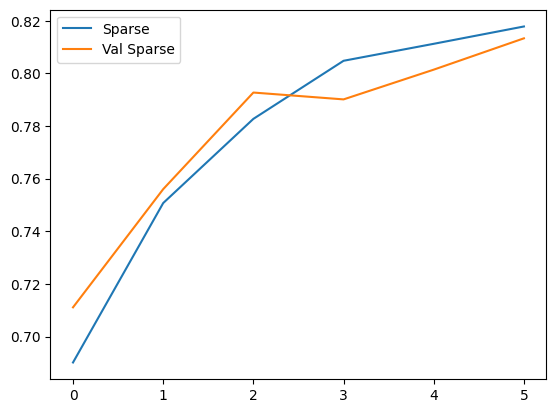

In [26]:
plt.plot(hist.history['sparse_categorical_accuracy'], label='Sparse')
plt.plot(hist.history['val_sparse_categorical_accuracy'], label='Val Sparse')
plt.legend()
plt.show()

In [12]:
hist.history

{'loss': [3.135237693786621,
  0.6777393817901611,
  0.6025310754776001,
  0.5542163252830505,
  0.5404731631278992,
  0.5241986513137817],
 'sparse_categorical_accuracy': [0.6901500225067139,
  0.7507166862487793,
  0.7827000021934509,
  0.8047666549682617,
  0.8112166523933411,
  0.817799985408783],
 'val_loss': [0.7848471403121948,
  0.673109769821167,
  0.6279643774032593,
  0.6169298887252808,
  0.601026177406311,
  0.5461971163749695],
 'val_sparse_categorical_accuracy': [0.7110999822616577,
  0.7559999823570251,
  0.7926999926567078,
  0.7900999784469604,
  0.8014000058174133,
  0.8133000135421753]}

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
Confusion Matrix:
tf.Tensor(
[[744   3 140  78   1   1  26   0   7   0]
 [  7 934  17  37   4   0   0   0   1   0]
 [ 15   0 741   7 217   0  20   0   0   0]
 [ 14   8  75 868  19   0  15   0   1   0]
 [  1   0 126  43 790   0  38   0   2   0]
 [  0   0   2   0   0 891   0  74   3  30]
 [169   0 310  45 133   0 338   0   5   0]
 [  0   0   0   0   0   9   0 964   0  27]
 [  3   0  67   4   2   2   3   5 914   0]
 [  1   0   0   0   0   9   0  41   0 949]], shape=(10, 10), dtype=int32)


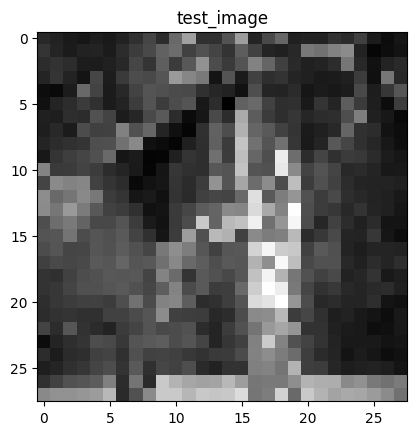

In [34]:
import cv2
im = cv2.imread("test_image2.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = cv2.resize(im, (28, 28))
im = im / 255.0

plt.imshow(im, cmap='gray')
plt.title("test_image")
plt.show()

In [36]:
x = model.predict(np.array([im]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


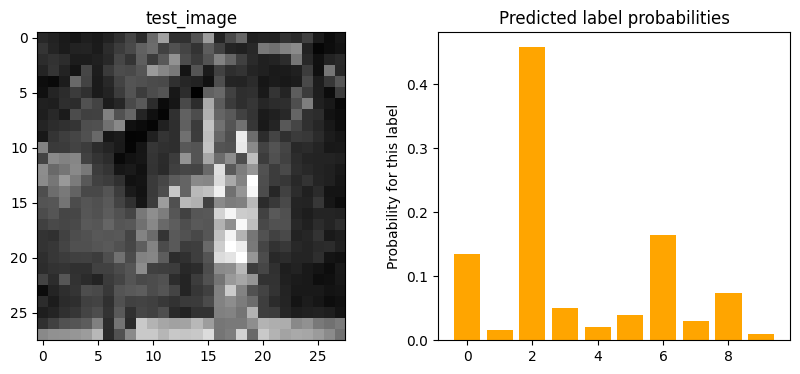

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
numbers = range(10)
counts = x[0].tolist()

ax[1].bar(numbers, counts, color='orange')
ax[1].set_ylabel('Probability for this label')
ax[1].set_title('Predicted label probabilities')
ax[0].imshow(im, cmap='gray')
ax[0].set_title('test_image')

plt.show()